In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

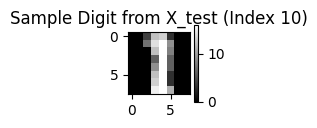

In [23]:
# Load the Digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
sample_index = 10
# Get the corresponding image (before scaling)
original_image = X_test[sample_index].reshape(8, 8)

# Plot the image
plt.figure(figsize=(1,1))
plt.imshow(original_image, cmap='gray')
plt.colorbar()
plt.title(f"Sample Digit from X_test (Index {sample_index})")
plt.show()



In [24]:
X_test = scaler.transform(X_test)
sample = X_test[sample_index]

In [25]:
sample = sample.tolist()

In [34]:
sample

[0.0,
 -0.34169755073421876,
 -0.2553476759720461,
 0.041578703534255766,
 0.2593082604212995,
 -0.5045262047991629,
 -0.4062342356040381,
 -0.13101874173265585,
 -0.061034923875429754,
 -0.6172540249299023,
 -0.6080578180904421,
 0.5040308740861628,
 1.18250095573049,
 0.11623264591309596,
 -0.5246550463811435,
 -0.13336004833930848,
 -0.04991521613769651,
 -0.7186458239734853,
 -1.7135505739135841,
 0.8316499068244146,
 1.441142808024228,
 0.013881615889170147,
 -0.552537004519684,
 -0.11409248204199549,
 -0.03733266964732785,
 -0.7701915930681215,
 -1.4488048921692886,
 -0.48697794625920005,
 0.9877791098189055,
 -0.2633566333638822,
 -0.6255487243927981,
 -0.04573893537463453,
 0.0,
 -0.6554764207327821,
 -1.1960781763357249,
 -0.013174196940218172,
 0.9561704883954462,
 -0.4484610500163638,
 -0.8134724065202669,
 0.0,
 -0.06519028566758817,
 -0.5200559979062301,
 -1.051220237473891,
 0.7338291389138247,
 1.334043491715753,
 -0.9216580012981291,
 -0.798886733214947,
 -0.09403434035

In [26]:
type(sample)

list

In [27]:
len(sample)

64

In [31]:
import requests


In [32]:
# Prepare the input
data = {
    "instances": [sample]  # The sample data
}


In [30]:
# Send the request
url = "http://localhost:1234/invocations"
headers = {"Content-Type": "application/json"}
response = requests.post(url, json=data, headers=headers)

# Print the prediction
if response.status_code == 200:
    print("Prediction:", response.json())
else:
    print("Error:", response.status_code, response.text)

Prediction: {'predictions': [1]}
